In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\kashy\Downloads\covid_19_clean_complete.csv")

In [3]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [6]:
df = df.drop([r'Province/State'],axis=1)

In [7]:
df

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [8]:
print(df)

              Country/Region        Lat       Long        Date  Confirmed  \
0                Afghanistan  33.939110  67.709953  2020-01-22          0   
1                    Albania  41.153300  20.168300  2020-01-22          0   
2                    Algeria  28.033900   1.659600  2020-01-22          0   
3                    Andorra  42.506300   1.521800  2020-01-22          0   
4                     Angola -11.202700  17.873900  2020-01-22          0   
...                      ...        ...        ...         ...        ...   
49063  Sao Tome and Principe   0.186400   6.613100  2020-07-27        865   
49064                  Yemen  15.552727  48.516388  2020-07-27       1691   
49065                Comoros -11.645500  43.333300  2020-07-27        354   
49066             Tajikistan  38.861000  71.276100  2020-07-27       7235   
49067                Lesotho -29.610000  28.233600  2020-07-27        505   

       Deaths  Recovered  Active             WHO Region  
0           0    

In [10]:
X = df[['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


C:\Users\kashy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kashy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kashy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kashy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kashy\anaconda3\lib\site-packages\sklearn\clust

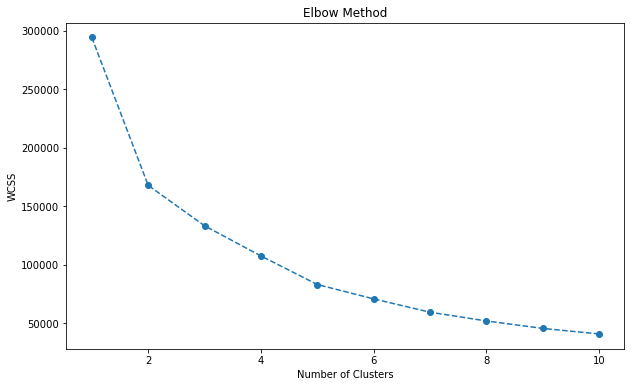

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
k = 5  # Example: Based on the elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

C:\Users\kashy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

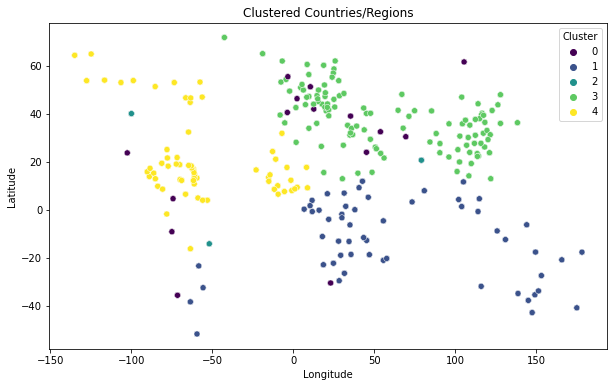

In [13]:
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Long', y='Lat', hue='Cluster', palette='viridis', legend='full')
plt.title('Clustered Countries/Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [15]:
region_confirmed = df.groupby('WHO Region')['Confirmed'].sum().reset_index()

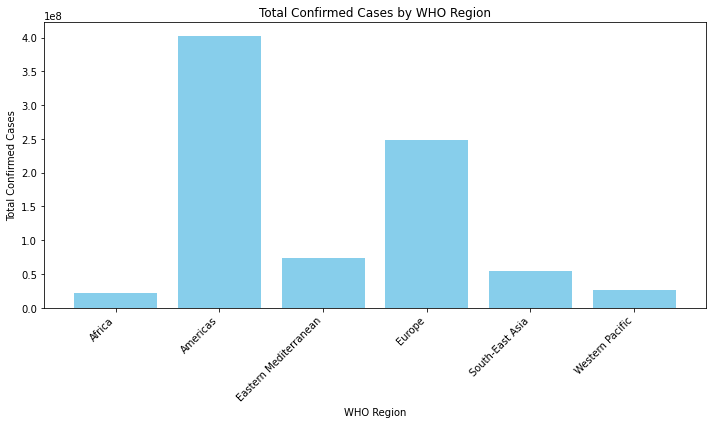

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(region_confirmed['WHO Region'], region_confirmed['Confirmed'], color='skyblue')
plt.title('Total Confirmed Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
data2 = pd.read_csv(r"C:\Users\kashy\Downloads\worldometer_data.csv")

In [21]:
data2.fillna(0,inplace=True)

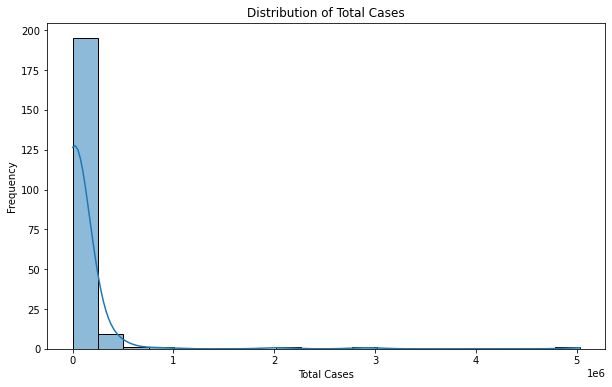

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data2, x='TotalCases', bins=20, kde=True)
plt.title('Distribution of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.show()


In [35]:
import geopandas as gpd

C:\Users\kashy\AppData\Local\Temp/ipykernel_24648/309921509.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


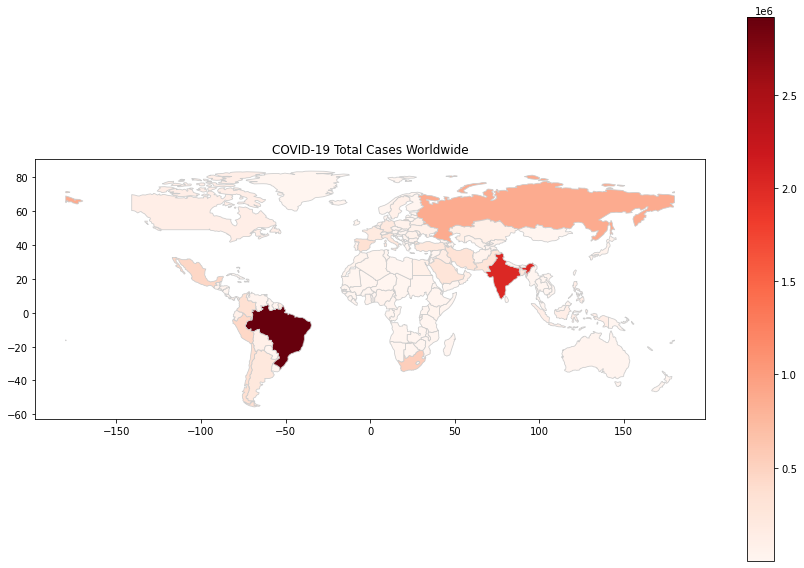

In [37]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


world = world.merge(data2[['Country/Region', 'TotalCases']], how='left', left_on='name', right_on='Country/Region')


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='TotalCases', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('COVID-19 Total Cases Worldwide')
plt.show()